In [1]:
#Libraries
import nltk
import numpy as np
import pandas as pd
import gensim
from gensim import corpora, models, similarities
from gensim.models import word2vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
import seaborn as sns
from functions.Capstone_functions import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from functions.Capstone_functions import *
%matplotlib inline
%matplotlib notebook
import pyLDAvis
import pyLDAvis.gensim
import plotly.express as px

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



** Topics Present in Tweets **

By constructing a LDA model, we were able to place the tweets into groups of topics based on words present in the text of each item. Below, are the common words for each topic in order of prevalence to assist with understanding the below visualizations. Based on these words, we can get a sense/gist of the main idea(s) in each topic group.

- Topic 0: 0.028*"news" + 0.023*"fake" + 0.016*"dont" + 0.016*"like" + 0.011*"media" + 0.011*"know" + 0.009*"think" + 0.009*"good" + 0.009*"democrats" + 0.009*"want"

- Topic 1: 0.077*"cases" + 0.065*"deaths" + 0.022*"death" + 0.021*"million" + 0.018*"number" + 0.015*"population" + 0.015*"rate" + 0.013*"world" + 0.013*"coronavirus" + 0.011*"total"

- Topic 2: 0.013*"federal" + 0.011*"pandemic" + 0.010*"hospital" + 0.010*"would" + 0.009*"health" + 0.009*"government" + 0.009*"patients" + 0.009*"economic" + 0.008*"national" + 0.007*"coronavirus"

- Topic 3: 0.018*"people" + 0.018*"trump" + 0.010*"back" + 0.010*"mike" + 0.009*"economy" + 0.009*"going" + 0.009*"even" + 0.008*"schools" + 0.008*"open" + 0.007*"keep"

- Topic 4: 0.024*"china" + 0.012*"people" + 0.010*"country" + 0.010*"like" + 0.010*"world" + 0.010*"help" + 0.009*"countries" + 0.008*"virus" + 0.007*"president" + 0.007*"_"

- Topic 5: 0.024*"countries" + 0.023*"india" + 0.022*"brazil" + 0.015*"south" + 0.014*"virus" + 0.013*"world" + 0.011*"still" + 0.011*"many" + 0.010*"testing" + 0.009*"china"

- Topic 6: 0.030*"mask" + 0.027*"masks" + 0.021*"social" + 0.019*"people" + 0.019*"wear" + 0.015*"time" + 0.013*"wearing" + 0.012*"distancing" + 0.011*"york" + 0.011*"states"

- Topic 7: 0.037*"trump" + 0.018*"president" + 0.017*"people" + 0.015*"great" + 0.010*"house" + 0.010*"americans" + 0.009*"white" + 0.008*"done" + 0.008*"america" + 0.008*"many"

- Topic 8: 0.048*"thank" + 0.018*"great" + 0.015*"border" + 0.011*"small" + 0.009*"businesses" + 0.009*"full" + 0.009*"travel" + 0.008*"support" + 0.008*"incredible" + 0.008*"family"

- Topic 9: 0.033*"great" + 0.023*"total" + 0.022*"complete" + 0.020*"endorsement" + 0.018*"strong" + 0.017*"military" + 0.014*"state" + 0.014*"vets" + 0.013*"workers" + 0.011*"amendment"


<AxesSubplot:xlabel='Topic', ylabel='count'>

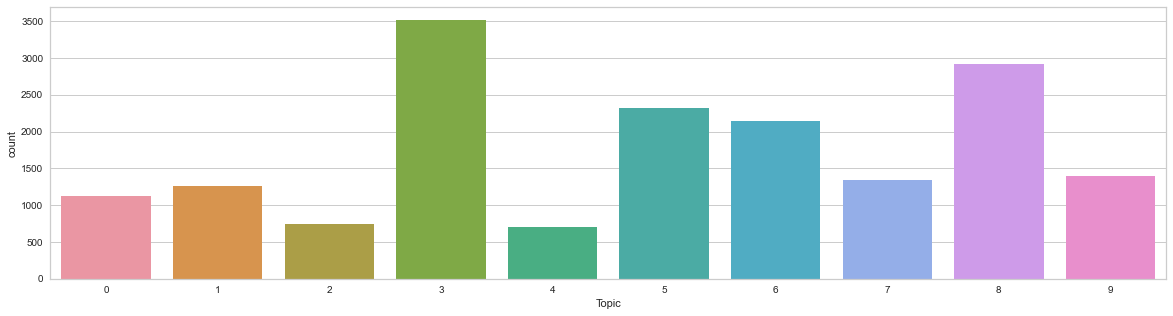

In [15]:
#Distribution of Topics presented in Tweets
Master_tweet_df =  pd.read_csv('data/data_8_08.csv')
Master_tweet_df['date'] = pd.to_datetime(Master_tweet_df['date'])
groupby_df_count = Master_tweet_df.groupby(['date']).count()
groupby_df_count.reset_index(level=0, inplace=True)
groupby_df_mean = Master_tweet_df.groupby(['date']).mean()
groupby_df_mean.reset_index(level=0, inplace=True)
plt.figure(figsize=(20,5))
sns.countplot(x='Topic',data=Master_tweet_df)

In [5]:
LDA_model = pickle.load(open('pickles/LDA_model.pickle','rb'))
tok_corp_8_8 = pickle.load(open('pickles/tok_corp_8_8.pickle','rb'))

The visual below builds upon the topic groups discussed above and provides insight into the top 20 most relevant terms for each topic as well as displaying how similar the topics were to one another. Instead of starting at zero like the visual above, the topics below start at 1.

In [6]:
list_of_list_of_tokens = list(tok_corp_8_8)
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

vis = pyLDAvis.gensim.prepare(topic_model=LDA_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

To better understand how owrds are similar to one another, the below visual allows one to select a word in the corpus and learn words that were similar/appeared closely to the word selected from the pull-down menu.

In [16]:
#Loading tok list
tok_corp_8_8 = pickle.load(open('pickles/tok_corp_8_8.pickle','rb'))
#Word2Vec model creation
model = gensim.models.Word2Vec(tok_corp_8_8,min_count=5,size= 100,workers=4, window =5, sg = 1)
#Word2Vec Vocabulary
tweet_vocab = model.wv.vocab
words = len(tweet_vocab)
widget_input = list(tweet_vocab)
plt.figure(figsize=(20,5))

interact(display_closestwords_tsnescatterplot,model=fixed(model),word=widget_input,size=fixed(100))

<Figure size 1440x360 with 0 Axes>

interactive(children=(Dropdown(description='word', options=('bold', 'honest', 'statement', 'brought', 'integri…

<function functions.Capstone_functions.display_closestwords_tsnescatterplot(model, word, size)>

In [17]:
Master_tweet_df =  pd.read_csv('data/data_8_08.csv')
Master_tweet_df['date'] = pd.to_datetime(Master_tweet_df['date'])
groupby_df_count = Master_tweet_df.groupby(['date']).count()
groupby_df_count.reset_index(level=0, inplace=True)
groupby_df_mean = Master_tweet_df.groupby(['date']).mean()
groupby_df_mean.reset_index(level=0, inplace=True)
fig = px.bar(groupby_df_count, x="date", y='tweet',title="Tweet Activity")
plt.figure(figsize=(20,5))
fig.show()

<Figure size 1440x360 with 0 Axes>

In [18]:
from functions.graphing_functions import *
plt.figure(figsize=(20,5))
interact(plotly_line,x=fixed('date'),y=['positive','death'], df=fixed(groupby_df_mean))


<Figure size 1440x360 with 0 Axes>

interactive(children=(Dropdown(description='y', options=('positive', 'death'), value='positive'), Output()), _…

<function functions.graphing_functions.plotly_line(df, x, y)>

In [20]:
fig = px.line(groupby_df_mean,x='date', y="Sentiment", title = 'Sentiment Analysis over Time')
plt.figure(figsize=(20,5))
#ax2= px.bar(Master_tweet_df, x='date',y='positive',color='positive', title = 'Sentiment Analysis in Relation to Cases')
fig.show()

<Figure size 1440x360 with 0 Axes>

In [19]:
Feelings_Time = Master_tweet_df[['date','Sentiment','positive','clean_text']]
plt.figure(figsize=(20,5))
fig = px.histogram(Feelings_Time, x='Sentiment', title='Distribution of Sentiment')
fig.show()

<Figure size 1440x360 with 0 Axes>

In [12]:
interact(plotly_scatter,y=fixed('Sentiment'),x=['word_count','char_count','likes_count','replies_count','retweets_count'],
         trendline=fixed('OLS'),color=fixed('Sentiment'), df=fixed(Master_tweet_df))

interactive(children=(Dropdown(description='x', options=('word_count', 'char_count', 'likes_count', 'replies_c…

<function functions.graphing_functions.plotly_scatter(df, x, y, trendline, color)>